<a href="https://colab.research.google.com/github/SujalChauhan04/Generative-AI-labfile/blob/main/Experiment-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.datasets import mnist # MNIST dataset is included in Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


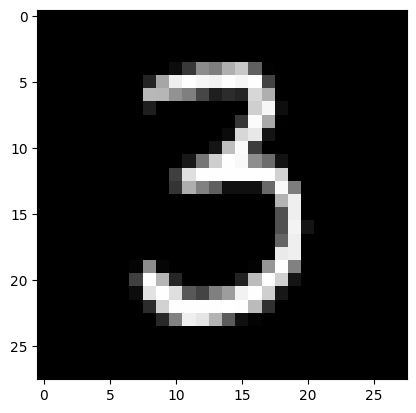

In [2]:
# Visualize any random image
import matplotlib.pyplot as plt
i=50;
plt.imshow(X_train[i], cmap='gray');


In [5]:
#Formatting the Input
# Single-channel input data (grey-scale)
# First apply convolutions then flatten
X_train = X_train.reshape(60000, 28, 28, 1) # single-channel input
X_test = X_test.reshape(10000, 28, 28, 1)
X_train = X_train.astype('float32') # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')
X_train /= 255 # min-max normalization
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [6]:
from keras import backend as K
from keras import __version__
print('Using Keras version:', __version__, 'backend:', K.backend())

Using Keras version: 2.15.0 backend: tensorflow


In [7]:
# import cnn layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import tensorflow as tf

In [9]:
model = Sequential() # Linear stacking of layers
# Convolution Layer 1: 8 filters, kernel size 3x3, relu activation, valid padding, stride 1
model.add(Conv2D(8, (3, 3), activation='relu', padding='valid', strides=(1,
1), input_shape=(28, 28, 1)))

In [11]:
# MaxPooling: pool size 2, stride 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Convolution Layer 2: 16 filters, kernel size 3x3, relu activation, valid padding, stride 1
model.add(Conv2D(16, (3, 3), activation='relu', padding='valid', strides=(1,
1)))
# MaxPooling: pool size 2, stride 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Flatten final feature matrix into a 1d array
model.add(Flatten())
# Fully Connected Layer: 64 units and relu activation
model.add(Dense(64, activation='relu'))
# Dropout layer, 0.2 rate
model.add(Dropout(0.2))
# Final output dense Layer
model.add(Dense(10, activation='softmax'))
# Compile the model with sparse_categorical_crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 64)                2

In [14]:
# Conv1: 3x3 kernels, one for each the single channel, 8 such filters and 8 biases
print('Conv1: ',3*3*1*8 + 8)
# Conv2: 3x3 kernels, one for each of the 8 channels, 16 such filters and 16 biases
print('Conv2: ',3*3*8*16 + 16)
# input to dense layer
print('Flatten:', 5*5*16)
# 400 inputs, 1 bias connected to each of 64 units in dense layer
print('Dense1: ',400*64+64)
# 64 inputs, 1 bias connected to each of 10 units in output layer
print('Dense2: ',64*10+10)

Conv1:  80
Conv2:  1168
Flatten: 400
Dense1:  25664
Dense2:  650


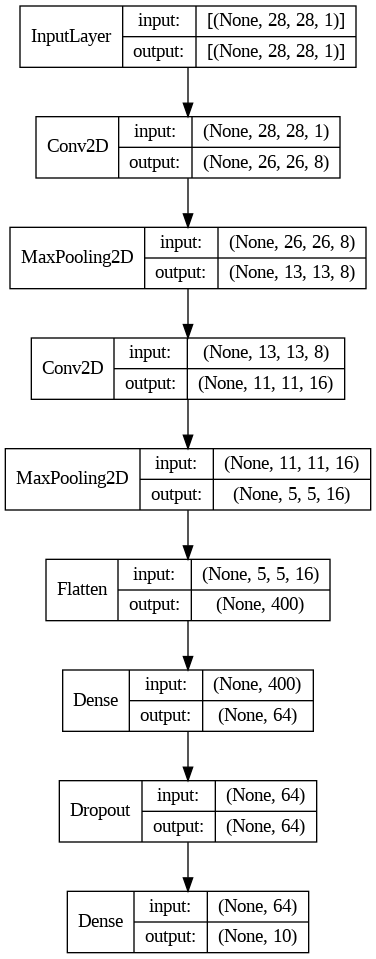

In [15]:
# Visualize the model
import tensorflow.keras
keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)


In [16]:
# Train the model
batch_size=128
epochs=10
hist = model.fit(X_train,
y_train,epochs=epochs,batch_size=batch_size,verbose=1,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 16s 39ms/step - loss: 0.5000 - accuracy: 0.8480 - val_loss: 0.1272 - val_accuracy: 0.9623
Epoch 2/10
375/375 [==============================] - 16s 42ms/step - loss: 0.1379 - accuracy: 0.9586 - val_loss: 0.0854 - val_accuracy: 0.9745
Epoch 3/10
375/375 [==============================] - 21s 55ms/step - loss: 0.0992 - accuracy: 0.9703 - val_loss: 0.0651 - val_accuracy: 0.9801
Epoch 4/10
375/375 [==============================] - 20s 53ms/step - loss: 0.0831 - accuracy: 0.9748 - val_loss: 0.0569 - val_accuracy: 0.9836
Epoch 5/10
375/375 [==============================] - 15s 39ms/step - loss: 0.0690 - accuracy: 0.9787 - val_loss: 0.0553 - val_accuracy: 0.9825
Epoch 6/10
375/375 [==============================] - 21s 55ms/step - loss: 0.0637 - accuracy: 0.9801 - val_loss: 0.0505 - val_accuracy: 0.9849
Epoch 7/10
375/375 [==============================] - 21s 57ms/step - loss: 0.0561 - accuracy: 0.9826 - val_loss: 0.0475 - val_accuracy:

In [17]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03575802221894264
Test accuracy: 0.9886000156402588


In [18]:
# make one prediction
print('Actual class:',y_test[0])
print('Class Probabilities:')
model.predict(X_test[0].reshape(1,28,28,1))

Actual class: 7
Class Probabilities:
1/1 [==============================] - 0s 218ms/step


array([[5.0195323e-09, 2.2156119e-09, 1.4580086e-09, 7.1625612e-07,
        6.5818518e-12, 9.5189101e-10, 6.1220485e-14, 9.9999905e-01,
        1.4133850e-09, 2.1516760e-07]], dtype=float32)

In [19]:
import numpy as np
yhat_test = np.argmax(model.predict(X_test),axis=-1)
print(yhat_test[0:10])
print(y_test[0:10])

313/313 [==============================] - 2s 6ms/step
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


In [20]:
from sklearn.metrics import accuracy_score
print('Accuracy:')
print(float(accuracy_score(y_test, yhat_test))*100,'%')

Accuracy:
98.86 %


In [21]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, yhat_test))

Confusion Matrix:
[[ 975    0    0    0    0    0    2    2    1    0]
 [   0 1132    1    0    0    0    1    1    0    0]
 [   2    4 1015    0    1    0    1    8    1    0]
 [   0    0    1 1003    0    2    0    1    3    0]
 [   0    0    1    0  975    0    0    0    1    5]
 [   2    0    0    8    0  876    2    2    0    2]
 [   3    2    1    0    5    4  943    0    0    0]
 [   0    2    9    1    1    0    0 1011    1    3]
 [   4    0    2    2    0    0    0    3  961    2]
 [   0    2    1    1    2    3    0    1    4  995]]


In [22]:
hist.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

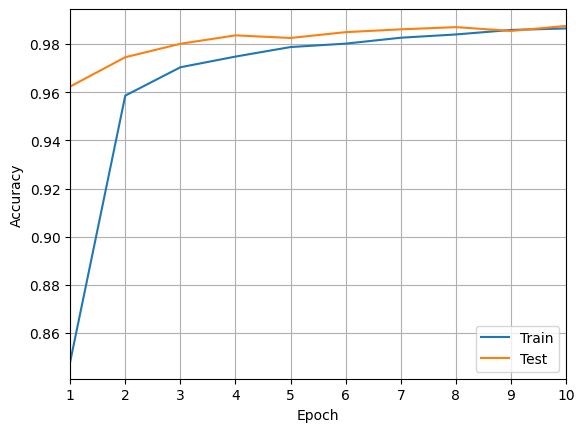

In [23]:
# Plot Accuracy vs epochs (DIY)
epochRange = range(1,epochs+1);
plt.plot(epochRange,hist.history['accuracy'])
plt.plot(epochRange,hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.xlim((1,epochs))
plt.legend(['Train','Test'])
plt.show()

In [23]:
# Plot Loss vs epochs (DIY)
epochRange = range(1,epochs+1);
plt.plot(epochRange,hist.history['loss'])
plt.plot(epochRange,hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.xlim((1,epochs))
plt.legend(['Train','Test'])
plt.show()


In [24]:
#module 2

In [43]:
model = Sequential()
# Convolution Layer 2: 16 filters, kernel size 4x4, relu activation, samepadding, stride 1
model.add(Conv2D(16, (4, 4), activation='relu', padding='same', strides=(2, 2), input_shape=(28,28,1) ))
# MaxPooling: pool size 2, stride 1
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
# Convolution Layer 2: 32 filters, kernel size 2x2, relu activation, valid padding, stride 1
model.add(Conv2D(32, (2, 2), activation='relu', padding='valid', strides=(1, 1)))
# MaxPooling: pool size 2, stride 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Flatten final feature matrix into a 1d array
model.add(Flatten())
# Fully Connected Layer: 64 units and relu activation
model.add(Dense(64, activation='relu'))
# Dropout layer, 0.3 rate
model.add(Dropout(0.3))
# Final output dense Layer
model.add(Dense(15, activation='softmax'))
# Compile the model with sparse_categorical_crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [45]:
model .summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        272       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 32)        2080      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [38]:
# Conv1: 3x3 kernels, one for each the single channel, 8 such filters and 8 biases
print('Conv1: ',3*3*1*8 + 8)
# Conv2: 3x3 kernels, one for each of the 8 channels, 16 such filters and 16 biases
print('Conv2: ',3*3*8*16 + 16)
# input to dense layer
print('Flatten:', 5*5*16)
# 400 inputs, 1 bias connected to each of 64 units in dense layer
print('Dense1: ',400*64+64)
# 64 inputs, 1 bias connected to each of 10 units in output layer
print('Dense2: ',64*10+10)

Conv1:  80
Conv2:  1168
Flatten: 400
Dense1:  25664
Dense2:  650


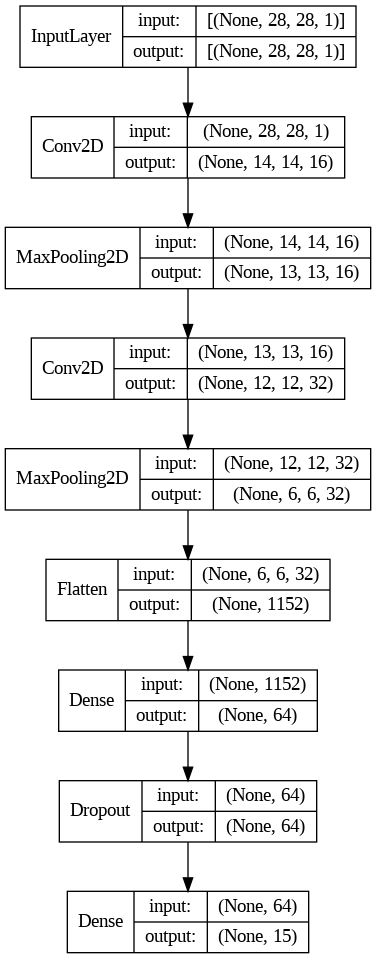

In [46]:
# Visualize the model
import tensorflow.keras
keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)


In [28]:
# Train the model
batch_size=128
epochs=10
hist = model.fit(X_train,
y_train,epochs=epochs,batch_size=batch_size,verbose=1,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 18s 48ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0411 - val_accuracy: 0.9879
Epoch 2/10
375/375 [==============================] - 23s 61ms/step - loss: 0.0371 - accuracy: 0.9881 - val_loss: 0.0423 - val_accuracy: 0.9872
Epoch 3/10
375/375 [==============================] - 18s 49ms/step - loss: 0.0340 - accuracy: 0.9890 - val_loss: 0.0392 - val_accuracy: 0.9885
Epoch 4/10
375/375 [==============================] - 28s 74ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.0443 - val_accuracy: 0.9869
Epoch 5/10
375/375 [==============================] - 21s 57ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 0.0419 - val_accuracy: 0.9884
Epoch 6/10
375/375 [==============================] - 22s 60ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0420 - val_accuracy: 0.9878
Epoch 7/10
375/375 [==============================] - 24s 64ms/step - loss: 0.0263 - accuracy: 0.9911 - val_loss: 0.0407 - val_accuracy:

In [29]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03420130908489227
Test accuracy: 0.9890999794006348


In [30]:
# make one prediction
print('Actual class:',y_test[0])
print('Class Probabilities:')
model.predict(X_test[0].reshape(1,28,28,1))

Actual class: 7
Class Probabilities:
1/1 [==============================] - 0s 25ms/step


array([[1.12031235e-11, 5.24561575e-11, 1.59356087e-11, 2.71781975e-08,
        2.02728103e-15, 2.47705849e-12, 2.03135971e-16, 1.00000000e+00,
        1.33088861e-11, 3.39056339e-09]], dtype=float32)

In [31]:
import numpy as np
yhat_test = np.argmax(model.predict(X_test),axis=-1)
print(yhat_test[0:10])
print(y_test[0:10])

313/313 [==============================] - 2s 6ms/step
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


In [32]:
from sklearn.metrics import accuracy_score
print('Accuracy:')
print(float(accuracy_score(y_test, yhat_test))*100,'%')

Accuracy:
98.91 %


In [33]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, yhat_test))

Confusion Matrix:
[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1131    0    1    0    0    1    1    1    0]
 [   1    3 1020    2    0    0    0    5    1    0]
 [   0    0    0 1006    0    1    0    0    3    0]
 [   0    0    1    0  969    0    0    2    2    8]
 [   1    0    0   11    0  875    1    1    0    3]
 [   4    3    2    0    1    4  942    0    2    0]
 [   0    2    3    3    1    0    0 1015    1    3]
 [   2    0    3    3    0    0    0    1  961    4]
 [   2    2    0    2    2    3    0    1    2  995]]


In [34]:
# Plot Accuracy vs epochs (DIY)
epochRange = range(1,epochs+1);
plt.plot(epochRange,hist.history['accuracy'])
plt.plot(epochRange,hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.xlim((1,epochs))
plt.legend(['Train','Test'])
plt.show()

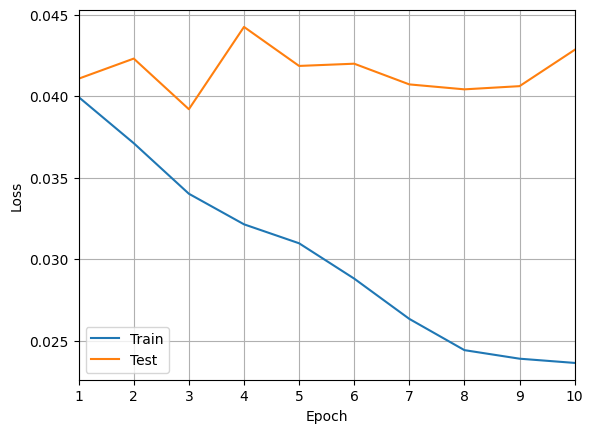

In [35]:
# Plot Loss vs epochs (DIY)
epochRange = range(1,epochs+1);
plt.plot(epochRange,hist.history['loss'])
plt.plot(epochRange,hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.xlim((1,epochs))
plt.legend(['Train','Test'])
plt.show()

In [48]:
# Model Evaluation
import pandas as pd
model_performance = pd.DataFrame(columns=['Accuracy'])

# Assuming m1Acc and m2Acc are calculated elsewhere,
# replace these with the actual calculations if needed
m1Acc = [0.95]  # Example accuracy for Model 1
m2Acc = [0.92]  # Example accuracy for Model 2

model_performance.loc['Model 1'] = [m1Acc[0]]
model_performance.loc['Model 2'] = [m2Acc[0]]

# Evaluation and Display
# Note: The following line seems redundant and can be removed
# model_performance.fillna(.90, inplace=True)

formatted_performance = model_performance.applymap(lambda x: '{:.2%}'.format(x))

# This line also seems redundant and can potentially overwrite the formatting
# model_performance.fillna(.90,inplace=True)

model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:}%'})

,Accuracy
Model 1,0.95%
Model 2,0.92%
